# Life Expectancy Using Machine Learning

### Description :-  *Life expectancy is a statistical measure of the average time a human being is expected to live, Life expectancy depends on various factors: Regional variations, Economic Circumstances, Sex Differences, Mental Illnesses, Physical Illnesses, Education, Year of their birth and other demographic factors. This problem statement provides a way to predicting average life expectancy of people living in a country when various factors such as year, GDP, education, alcohol intake of people in the country, expenditure on healthcare system and some specific disease related deaths that happened in the country are given.*

## 1. Importing the requiered libraries.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
%matplotlib inline

## 2. Importing the dataset. 

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_c5b737429cc64ea9bb95535cb61cb2a2 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='_ix9E0RMSv5efA3dchaU7ON9jOWO_RDI-Vxmou1Uljbn',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_c5b737429cc64ea9bb95535cb61cb2a2.get_object(Bucket='predictinglifeexpectancy-donotdelete-pr-qyk4ahuihe7e9s',Key='Life_Expectancy_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()
# Ganapati Bappa Morya

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## 3. Data analysis.

In [3]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'Infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
df.shape

(2938, 22)

In [6]:
df.describe()

,Year,Life expectancy,Adult Mortality,Infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [7]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
Infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

## 4. Data pre-processing and handling the empty values.

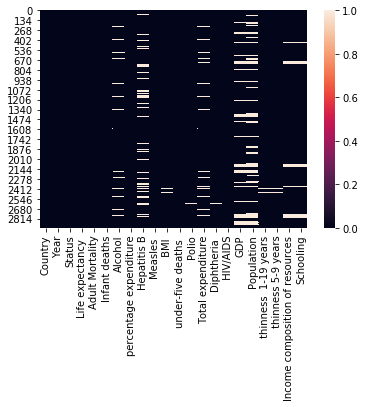

In [8]:
sns.heatmap(df.isnull())

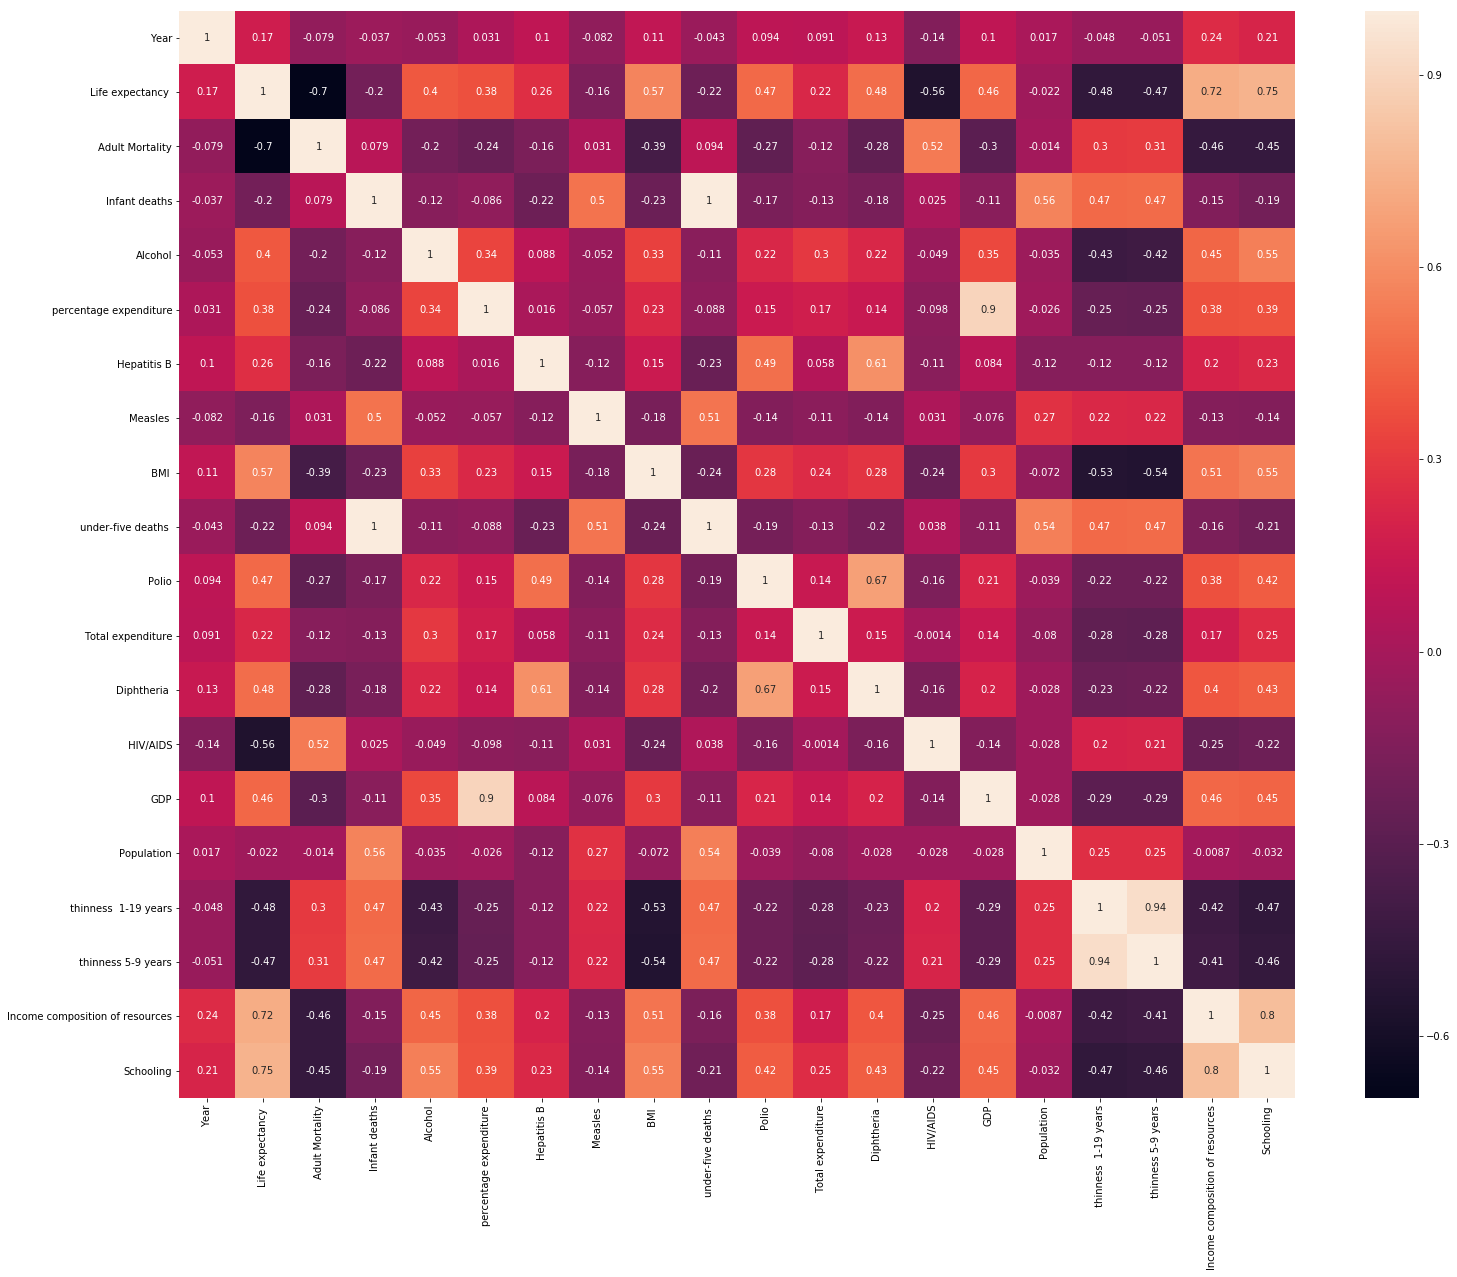

In [9]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

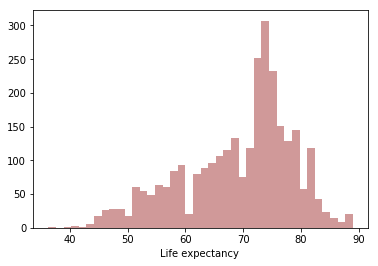

In [10]:
sns.distplot(df['Life expectancy '].dropna(),kde=False,color='darkred',bins=40)

In [11]:
df = df.fillna(df.mean())

In [12]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
Infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [13]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,Infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.010000,71.279624,65.000000,1154,...,6.0,8.16000,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.010000,73.523582,62.000000,492,...,58.0,8.18000,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.010000,73.219243,64.000000,430,...,62.0,8.13000,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.010000,78.184215,67.000000,2787,...,67.0,8.52000,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.010000,7.097109,68.000000,3013,...,68.0,7.87000,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.010000,79.679367,66.000000,1989,...,66.0,9.20000,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.010000,56.762217,63.000000,2861,...,63.0,9.42000,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.030000,25.873925,64.000000,1599,...,64.0,8.33000,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.020000,10.910156,63.000000,1141,...,63.0,6.73000,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.030000,17.171518,64.000000,1990,...,58.0,7.43000,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


## 5. Applying the Linear Regression. 

### Step 1 :- Spliting data into training and testing data

In [14]:
x = df[['Year','Adult Mortality',
       'Infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']]
y = df['Life expectancy ']

In [15]:
y

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
5       58.8
6       58.6
7       58.1
8       57.5
9       57.3
10      57.3
11      57.0
12      56.7
13      56.2
14      55.3
15      54.8
16      77.8
17      77.5
18      77.2
19      76.9
20      76.6
21      76.2
22      76.1
23      75.3
24      75.9
25      74.2
26      73.5
27      73.0
28      72.8
29      73.3
        ... 
2908    63.0
2909    59.2
2910    58.2
2911    58.0
2912    57.4
2913    55.7
2914    52.6
2915    58.0
2916    49.3
2917    47.9
2918    46.4
2919    45.5
2920    44.6
2921    43.8
2922    67.0
2923    59.2
2924    58.0
2925    56.6
2926    54.9
2927    52.4
2928    50.0
2929    48.2
2930    46.6
2931    45.4
2932    44.6
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2938, dtype: float64

In [16]:
print(x.shape)
print(y.shape)

(2938, 19)
(2938,)


In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Step 2 :- Creating the Linear Regression model

In [18]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
regressor.intercept_

98.78508106037664

In [20]:
regressor.coef_

array([-2.21285316e-02, -2.03096091e-02,  9.71482839e-02,  9.07330014e-02,
        1.24881333e-04, -1.24420108e-02, -2.17304913e-05,  4.04526531e-02,
       -7.23710535e-02,  2.56157909e-02,  1.17891674e-01,  3.90181641e-02,
       -4.75232431e-01,  3.82775334e-05, -6.94425566e-10, -7.37931124e-02,
       -1.99320393e-02,  6.30774282e+00,  6.89847663e-01])

### Step 4 :- Testing the model on basis of the testing data

In [21]:
y_pred = regressor.predict(x_test)

In [22]:
y_pred

array([64.55431175, 75.41787521, 74.85131919, 52.97244496, 48.92628322,
       77.19163726, 77.19138785, 78.82115244, 61.49391916, 77.93012079,
       46.46076377, 76.58768295, 63.21206322, 69.60461308, 46.52543801,
       46.98715257, 56.00717622, 63.29229186, 74.36578385, 71.26137841,
       78.5190092 , 71.40752312, 63.96808742, 73.9591465 , 82.00578375,
       59.1998754 , 69.16223793, 72.02689662, 68.14013473, 65.25700025,
       73.92078539, 76.35093554, 63.68307395, 44.87839455, 85.4334551 ,
       77.11048416, 76.20051011, 60.99158835, 78.84402321, 76.6364494 ,
       74.59979451, 59.73137948, 77.04948907, 68.00022123, 68.53844773,
       62.75406362, 72.5118472 , 73.4165634 , 76.543965  , 72.42298768,
       74.57148415, 73.21207116, 68.64321432, 58.22569724, 71.38622855,
       73.72538521, 74.9525375 , 71.98192678, 61.60965337, 71.68811747,
       72.30627167, 68.83616633, 70.89680589, 60.36744557, 62.5755989 ,
       73.31840755, 69.66804126, 76.5928093 , 74.1583256 , 61.53

In [23]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
1191,66.4,64.554312
184,75.6,75.417875
219,73.8,74.851319
2408,57.3,52.972445
2403,53.8,48.926283
1860,78.6,77.191637
1319,83.0,77.191388
1322,82.6,78.821152
1770,53.8,61.493919
684,78.6,77.930121


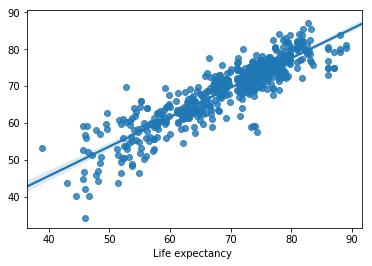

In [24]:
sns.regplot(y_test,y_pred)

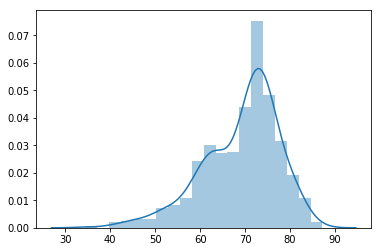

In [25]:
sns.distplot(y_pred)

## 6. Evaluating the Algorithm

Evaluating the Algorithm
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For regression algorithms, three evaluation metrics are commonly used:
1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors.
2. Mean Squared Error (MSE) is the mean of the squared errors.
3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.

In [26]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.1044161468061793
Mean Squared Error: 18.05687681654652
Root Mean Squared Error: 4.249338397509255


## 7. Adding the Machine Learning API and creating the repository and deployments.

In [27]:
!pip install watson-machine-learning-client

In [28]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-16 07:37:28,690 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [29]:
wml_credentials={
  "apikey": "rSJpRzCll6SznPPNLzlRzFeIgnGmvBZNJ8PYXmUh2Atx",
  "iam_apikey_description": "Auto-generated for key 3d392450-86a5-4f53-a33f-526fe7872582",
  "iam_apikey_name": "wdp-writer",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/596e97c0838b4f13bfc479f9f407fb4f::serviceid:ServiceId-4400017a-d1f2-4172-a3e9-b429c561e06b",
  "instance_id": "40b357b2-0a2a-4cbe-9fe0-4074f295ddcf",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [30]:
client = WatsonMachineLearningAPIClient(wml_credentials)

In [31]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Shubham", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "shubhamdzope9@gmail.com", 
               client.repository.ModelMetaNames.NAME: "Life Expectancy"}

In [32]:
model_artifact =client.repository.store_model(regressor, meta_props=model_props)

In [33]:
model_artifact

{'metadata': {'guid': 'ca12ab4c-e145-4b3e-b9ab-19d429e34ebb',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/40b357b2-0a2a-4cbe-9fe0-4074f295ddcf/published_models/ca12ab4c-e145-4b3e-b9ab-19d429e34ebb',
  'created_at': '2020-06-16T07:37:28.953Z',
  'modified_at': '2020-06-16T07:37:29.015Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'learning_configuration_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/40b357b2-0a2a-4cbe-9fe0-4074f295ddcf/published_models/ca12ab4c-e145-4b3e-b9ab-19d429e34ebb/learning_configuration',
  'author': {'name': 'Shubham'},
  'name': 'Life Expectancy',
  'learning_iterations_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/40b357b2-0a2a-4cbe-9fe0-4074f295ddcf/published_models/ca12ab4c-e145-4b3e-b9ab-19d429e34ebb/learning_iterations',
  'feedback_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/40b357b2-0a2a-4cbe-9fe0-4074f295ddcf/published_models/ca12ab4c-e145-4b3e-b9ab-19d429e34ebb/feedback',
  'latest_version': {'url': '

In [34]:
guid = client.repository.get_model_uid(model_artifact)

In [35]:
guid

'ca12ab4c-e145-4b3e-b9ab-19d429e34ebb'

In [36]:
deploy = client.deployments.create(guid, name="deploy_name")



#######################################################################################

Synchronous deployment creation for uid: 'ca12ab4c-e145-4b3e-b9ab-19d429e34ebb' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='0896a96e-5448-4c9e-88ee-5ad899693aec'
------------------------------------------------------------------------------------------------




In [37]:
scoring_url = client.deployments.get_scoring_url(deploy)

In [38]:
scoring_url

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/40b357b2-0a2a-4cbe-9fe0-4074f295ddcf/deployments/0896a96e-5448-4c9e-88ee-5ad899693aec/online'

In [39]:
client.deployments.list()

------------------------------------  -----------  ------  --------------  ------------------------  -----------------  -------------
GUID                                  NAME         TYPE    STATE           CREATED                   FRAMEWORK          ARTIFACT TYPE
0896a96e-5448-4c9e-88ee-5ad899693aec  deploy_name  online  DEPLOY_SUCCESS  2020-06-16T07:37:31.688Z  scikit-learn-0.20  model
------------------------------------  -----------  ------  --------------  ------------------------  -----------------  -------------
